# A* Algorithm implementation

#### f(n)=g(n)+h(n)

**input:** 

nodes with adj matrix(path and length) and heuristic values

**output:**

we get the cost, and the path based on current cost + heuristic value

1. aStarSearchUtil:
    - check if we are at goal node
    - else we mark the v node as visited and append it in path
    - if v is the destination node then we set the value as 1 to stop the recursive call
    - else get the priority queue and its size
    - iterate for elements in priority queue
    - if dest not the queue will call the Util function again
    
    



In [1]:
#aStarUtil called by aStar for the iterating through the connected nodes
def aStarSearchUtil(G, v, visited, final_path, dest, goal):
    if goal == 1:
        return goal
    visited[v] = True
    final_path.append(v)
    if v == dest:
        goal = 1
    else:
        pq_list = []
        pq,size = getPriorityQueue(G, v)
        for i in range(size):
            pq_list.append(pq.get().description)
        for i in pq_list:
            if goal != 1:
                
                if visited[i] == False :
                    goal = aStarSearchUtil(G, i, visited, final_path, dest, goal)
    return goal

   

In [2]:
#Creates priority queue , based on heuristic value
def getPriorityQueue(G, v):
    q = Q.PriorityQueue()
    for node in G[v]:
        q.put(Ordered_Node(float(heuristics[node])+float(G[node][v]['length']),node))
    return q,len(G[v])



2. aStarSearch:
    - get the visited set
    - for each node in the graph set visited as False
    - the final path for the traversal in stored in the array: final_path
    - goal calls util function that iterates and recurvisely call itself for the traversal
    - from the final path array we draw the traversal graph
    

In [11]:
import networkx as nx
def aStarSearch(G, source, dest, heuristics, pos): 
    visited = {}
    for node in G.nodes():
        visited[node] = False
    final_path = []
    goal = aStarSearchUtil(G, source, visited, final_path, dest, 0)
    prev = -1
    print(final_path)
    for var in final_path:
        if prev != -1:
            curr = var
            nx.draw_networkx_edges(G, pos, edgelist = [(prev,curr)], width = 3, edge_color = 'green')
            prev = curr
        else:
            prev = var
    return

In [12]:
import queue as Q
# based on the priority order the node

class Ordered_Node(object):
    def __init__(self, priority, description):
        self.priority = priority
        self.description = description
        return
    def __lt__(self, other):
        return self.priority < other.priority

3. Heuristic file:
    - from the heuristic file get the set of heuristic location name and their respective heuristic values
    
{'A': '366', 'B': '0', 'C': '160', 'D': '242', 'E': '161', 'F': '178', 'G': '77', 'H': '151', 'I': '226', 'L': '244', 'M': '241', 'N': '234', 'O': '380', 'P': '98', 'R': '193', 'S': '253', 'T': '329', 'U': '80', 'V': '199', 'Z': '374'}

In [18]:
#get the heuristic values from the text file
def getHeuristics(G):
    heuristics = {}
    f = open('heuristic.txt')
    for i in G.nodes():
        node_heuristic_val = f.readline().split()
        heuristics[node_heuristic_val[0]] = node_heuristic_val[1]
#     print(heuristics)
    return heuristics

4. CreateGraph:
    - networkx used for graph node creation
    - read input file
    - n is number of lines in the input file
    - create edge between the given node names with their respective lengths


In [6]:
def CreateGraph():
    G = nx.Graph()
    f = open('inputNodes.txt')
    n = int(f.readline())
    for i in range(n):
        graph_edge_list = f.readline().split()
        G.add_edge(graph_edge_list[0], graph_edge_list[1], length = graph_edge_list[2]) 
    source, dest= f.read().splitlines()
    return G, source, dest


5. DrawPath:
    - to draw the graph
    - source as green
    - target as red
    - other nodes blue
 

In [14]:
def DrawPath(G, source, dest):
    pos = nx.spring_layout(G)
    val_map = {}
    val_map[source] = 'green'
    val_map[dest] = 'red'
    values = [val_map.get(node, 'blue') for node in G.nodes()]
    nx.draw(G, pos, with_labels = True, node_color = values, edge_color = 'b' ,width = 1)  
    edge_labels = dict([((u, v,), d['length']) for u, v, d in G.edges(data = True)])
    nx.draw_networkx_edge_labels(G, pos, edge_labels = edge_labels, label_pos = 0.5, font_size = 11) 
    return pos

6. Main function calls:
    - Create graph ( fetch txt file & create graph between the nodes with length)
    - Heuristic values of each node are the fetched from other file
    - draw the path for the nodes (display the graph, with source,target, other nodes)
    - apply aStar algorithm from source to target and mark it with green path

['A', 'S', 'R', 'P', 'B']


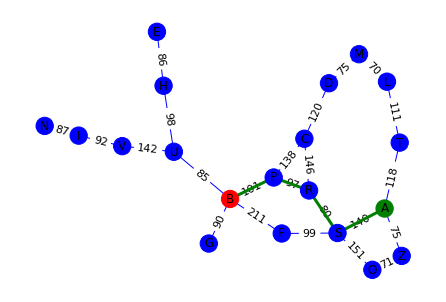

In [20]:
G,source,dest = CreateGraph()
heuristics = getHeuristics(G)
pos = DrawPath(G, source, dest)
aStarSearch(G, source, dest, heuristics, pos)


In [26]:
def fun(i,k):
    return i>k

ans=fun(7,8)
print(ans)

False
